# Replication of Figure 5

In [1]:
from src.experiments import DARNN_Table2
from src.utils import set_seed
import numpy as np 

In [2]:
epochs = 50
load_model = True

hidden_dim_lst = [16, 32, 64, 128, 256]
seq_len = 3
batch_size = 32
seeds = [1, 2, 3]

for hidden_dim in hidden_dim_lst:
    rmse_lst = []
    mae_lst = []
    mape_lst = []
    for seed in seeds:
        set_seed(seed)
        hidden_dim_encoder = hidden_dim
        hidden_dim_decoder = hidden_dim
        rmse, mae, mape = DARNN_Table2(seq_len=seq_len, 
                                       hidden_dim_encoder=hidden_dim_encoder, 
                                       hidden_dim_decoder=hidden_dim_decoder,
                                       batch_size=batch_size,
                                       epochs=epochs,
                                       seed=seed,
                                       load_model=load_model)
        rmse_lst.append(rmse)
        mae_lst.append(mae)
        mape_lst.append(mape*10000)
    
    print(f"Hidden_Dim: {hidden_dim}")
    print(f"RMSE: {np.mean(rmse_lst):0.4f} +/- {np.std(rmse_lst):0.4f}")
    print(f"MAE: {np.mean(mae_lst):0.4f} +/- {np.std(mae_lst):0.4f}")
    print(f"MAPE: {np.mean(mape_lst):0.4f}10^-2% +/- {np.std(mape_lst):0.4f}")
    print("\n")

Hidden_Dim: 16
RMSE: 3.6212 +/- 1.6146
MAE: 3.2266 +/- 1.6960
MAPE: 6.532210^-2% +/- 3.4333


Hidden_Dim: 32
RMSE: 1.5240 +/- 0.8256
MAE: 1.2073 +/- 0.6489
MAPE: 2.443810^-2% +/- 1.3136


Hidden_Dim: 64
RMSE: 0.6982 +/- 0.4247
MAE: 0.5762 +/- 0.4071
MAPE: 1.166110^-2% +/- 0.8239


Hidden_Dim: 128
RMSE: 0.4125 +/- 0.0294
MAE: 0.2863 +/- 0.0137
MAPE: 0.579610^-2% +/- 0.0278


Hidden_Dim: 256
RMSE: 0.4272 +/- 0.0138
MAE: 0.2922 +/- 0.0037
MAPE: 0.591410^-2% +/- 0.0075




# Replication of Figure 5

Hidden_Dim: 16
RMSE: 3.6212 +/- 1.6146

Hidden_Dim: 32
RMSE: 1.5240 +/- 0.8256

Hidden_Dim: 64
RMSE: 0.6982 +/- 0.4247

Hidden_Dim: 128
RMSE: 0.4125 +/- 0.0294

Hidden_Dim: 256
RMSE: 0.4272 +/- 0.0138


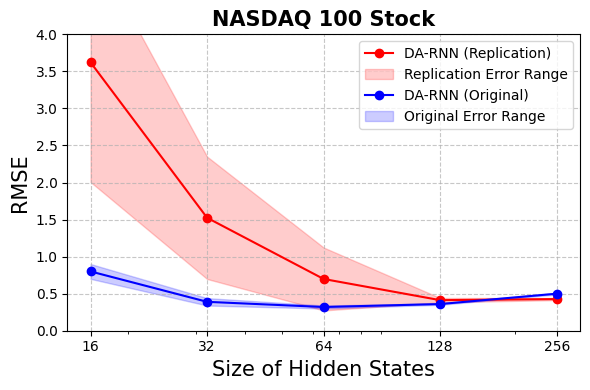

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Data for replication
hidden_dims = np.array([16, 32, 64, 128, 256])
rmse_replication = np.array([3.6212, 1.5240, 0.6982, 0.4125, 0.4272])
rmse_replication_error = np.array([1.6146, 0.8256, 0.4247, 0.0294, 0.0138])

# Data for original paper (estimated values from the Figure 5)
rmse_original = np.array([0.8, 0.39, 0.32, 0.36, 0.5])
rmse_original_error = np.array([0.1, 0.05, 0.02, 0.01, 0.01])

# Plot
plt.figure(figsize=(6, 4))

# Replication results
plt.plot(hidden_dims, rmse_replication, '-o', color='red', label='DA-RNN (Replication)')
plt.fill_between(hidden_dims, 
                 rmse_replication - rmse_replication_error, 
                 rmse_replication + rmse_replication_error, 
                 color='red', alpha=0.2, label='Replication Error Range')

# Original results
plt.plot(hidden_dims, rmse_original, '-o', color='blue', label='DA-RNN (Original)')
plt.fill_between(hidden_dims, 
                 rmse_original - rmse_original_error, 
                 rmse_original + rmse_original_error, 
                 color='blue', alpha=0.2, label='Original Error Range')

# Additional plot aesthetics
plt.title('NASDAQ 100 Stock', fontsize=15, fontweight='bold')
plt.xlabel('Size of Hidden States', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.xscale('log')  # Log scale for hidden dimensions
plt.xticks(hidden_dims, labels=hidden_dims)  # Ensure correct tick labels
plt.ylim(0, 4)  # Adjust y-axis limits for better visualization
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()